In [3]:
import sys
sys.path.append("..")
import grouping_cascades
import gen_weightedMaxCut
import readout
import qiskit as qk
import networkx as nx
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import random

# Weighted Max Cut Instances

Note that regenerating the circuits will reproduce the problem graphs exactly - but not the randomly chosen weights. However, the weights do not really influence the runtimes - they are mainly governed by the problem graph's structure and the number of qubits.

The displayed runtimes stem from computations on a on a machine with a 16-core AMD Ryzen Threadripper PRO 5955WX CPU and 128 GB RAM. 

### $q=30$ sizes=[15,15], $p_{inter}=0.1$

In [6]:
q = 30
seed = 4
cut_loc = 14
sizes = [15,15]
p_intra = 0.8
p_inter = 0.1
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('15', [(7, 15), (8, 15), (10, 15)])
('10', [(10, 24), (10, 25)])
('27', [(1, 27), (9, 27)])
('29', [(2, 29), (7, 29)])
('18', [(3, 18), (11, 18)])
('7s0', [(4, 22)])
('7s1', [(9, 20)])
('7s2', [(12, 26)])
('9s0', [(6, 23)])
('9s1', [(14, 28)])
('12', [(12, 17)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14),

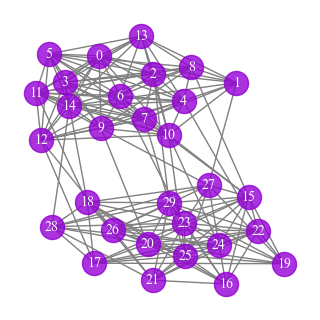

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter010_pintra080_weights


In [7]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [8]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [9]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =43.16942, std=0.1343627239973939
Block: Mean =0.6180796000000001, std=0.02119766231073605
No Block: Mean =118.02239999999999, std=2.040881241032902
--------Sim times---------
No cut: Mean =42.90596000000001, std=0.13394808845220624
Block: Mean =0.6176368, std=0.021206826772527762
No Block: Mean =118.02239999999999, std=2.040881241032902
-----Paths-----
Block: 2048
No Block: 131072
--------Ratios--------
S/J = 69.8444342767501
T/J = 190.9501624062661


### $q=30$ sizes=[15,15], $p_{inter}=0.15$

In [10]:
q = 30
seed = 4
cut_loc = 14
sizes = [15,15]
p_intra = 0.8
p_inter = 0.15
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('28', [(1, 28), (2, 28), (6, 28), (7, 28), (10, 28), (13, 28)])
('6', [(6, 16), (6, 20), (6, 22), (6, 29)])
('10', [(10, 16), (10, 25), (10, 26)])
('16', [(2, 16)])
('18', [(4, 18), (5, 18), (11, 18)])
('19', [(7, 19), (8, 19), (13, 19)])
('25', [(9, 25), (12, 25)])
('1', [(1, 17)])
('17', [(5, 17)])
('2s0', [(4, 23)])
('4s0', [(14, 23)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), 

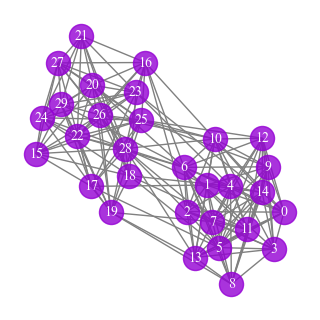

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter015_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter015_pintra080_weights


In [11]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [12]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [13]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =45.292199999999994, std=0.02405684933651961
Block: Mean =1.479932, std=0.054374421339449655
--------Sim times---------
No cut: Mean =45.02876, std=0.025637987440514313
Block: Mean =1.444242, std=0.05473429140858589
-----Paths-----
Block: 4096
--------Ratios--------
S/J = 30.604243978777397
T/J >= 2432.544197976664


### $q=30$, sizes=[15,15], $p_{inter}=0.17$

In [14]:
q = 30
seed = 4
cut_loc = 14
sizes = [15,15]
p_intra = 0.8
p_inter = 0.17
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('24', [(2, 24), (4, 24), (8, 24), (9, 24)])
('9', [(9, 22), (9, 23), (9, 28)])
('1', [(1, 15), (1, 25), (1, 28)])
('25', [(4, 25), (11, 25)])
('28', [(5, 28)])
('4', [(4, 16)])
('5', [(5, 22), (5, 26)])
('6', [(6, 18), (6, 19), (6, 23)])
('27', [(3, 27), (12, 27)])
('16', [(7, 16)])
('22s0', [(7, 21)])
('22s1', [(11, 17)])
('22s2', [(13, 20)])
('22s3', [(14, 17)])
('18', [(12, 18)])
('23s0', [(8, 29)])
('7s0', [(13, 21)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 

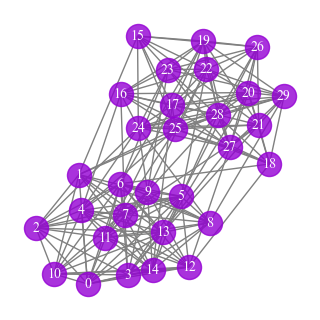

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter017_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter017_pintra080_weights


In [15]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [16]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [17]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =46.27966, std=0.050624286661642044
Block: Mean =49.003159999999994, std=1.648132679853171
--------Sim times---------
No cut: Mean =46.01806, std=0.05074152540079899
Block: Mean =48.99056, std=1.6462438149921779
-----Paths-----
Block: 131072
--------Ratios--------
S/J = 0.94442195156394
T/J >= 73.46465003481408


### $q=31$ sizes=[15,16], $p_{inter}=0.1$

In [18]:
q = 31
seed = 4
cut_loc = 14
sizes = [15,16]
p_intra = 0.8
p_inter = 0.1
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('23', [(7, 23), (10, 23), (14, 23)])
('9', [(9, 18), (9, 21), (9, 30)])
('30', [(11, 30), (13, 30)])
('27', [(2, 27), (8, 27)])
('15', [(3, 15), (10, 15)])
('18', [(4, 18)])
('6', [(6, 17), (6, 24)])
('7', [(7, 22)])
('21', [(11, 21)])
('10s0', [(1, 26)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 1

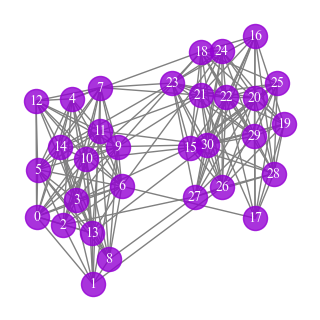

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter010_pintra080_weights


In [19]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [20]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [21]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =91.95566, std=0.11993610965843374
Block: Mean =0.3893328, std=0.050267242969552255
No Block: Mean =308.67120000000006, std=4.551957925991854
--------Sim times---------
No cut: Mean =91.43456, std=0.12227687598233601
Block: Mean =0.3786926, std=0.04938531616827009
No Block: Mean =308.67120000000006, std=4.551957925991854
-----Paths-----
Block: 1024
No Block: 262144
--------Ratios--------
S/J = 236.18780642165262
T/J = 792.8209490697934


### $q=31$ sizes=[15,16], $p_{inter}=0.15$

In [22]:
q = 31
seed = 4
cut_loc = 14
sizes = [15,16]
p_intra = 0.8
p_inter = 0.15
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('16', [(1, 16), (6, 16), (9, 16), (10, 16)])
('6', [(6, 22), (6, 23), (6, 28)])
('10', [(10, 15), (10, 18), (10, 23)])
('1', [(1, 27), (1, 30)])
('30', [(3, 30), (5, 30)])
('4', [(4, 19), (4, 28), (4, 29)])
('22', [(9, 22), (12, 22)])
('27', [(7, 27)])
('26', [(2, 26), (5, 26)])
('19', [(14, 19)])
('28s0', [(7, 21)])
('28s1', [(13, 15)])
('28s2', [(14, 20)])
('29', [(11, 29)])
('5s0', [(13, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8,

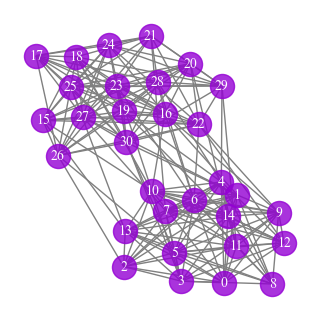

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter015_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter015_pintra080_weights


In [23]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [24]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [25]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =97.37204, std=0.0564350812881488
Block: Mean =13.874259999999998, std=0.12179738256629341
--------Sim times---------
No cut: Mean =96.85101999999999, std=0.05572099783744022
Block: Mean =13.862639999999999, std=0.12180289980127718
-----Paths-----
Block: 32768
--------Ratios--------
S/J = 7.018178987564022
T/J >= 259.47329803535473


### $q=31$ sizes=[15,16], $p_{inter}=0.17$

In [26]:
q = 31
seed = 4
cut_loc = 14
sizes = [15,16]
p_intra = 0.8
p_inter = 0.17
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('30', [(0, 30), (6, 30), (8, 30), (10, 30), (14, 30)])
('5', [(5, 17), (5, 21), (5, 23), (5, 28), (5, 29)])
('14', [(14, 19), (14, 20), (14, 24), (14, 25)])
('24', [(1, 24), (3, 24), (12, 24)])
('8', [(8, 16), (8, 21), (8, 29)])
('22', [(2, 22), (10, 22), (11, 22)])
('21', [(4, 21)])
('6', [(6, 17), (6, 25)])
('19', [(9, 19), (13, 19)])
('12', [(12, 15), (12, 23)])
('1', [(1, 27)])
('3', [(3, 28)])
('28s0', [(4, 20)])
('4s0', [(9, 15)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13

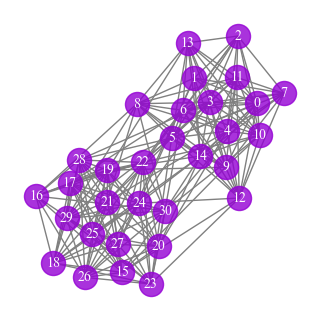

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter017_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter017_pintra080_weights


In [27]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [28]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [29]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =99.85992, std=0.051078112729429005
Block: Mean =6.670045999999999, std=0.15239726934561534
--------Sim times---------
No cut: Mean =99.33918, std=0.04956298618929132
Block: Mean =6.619648, std=0.14627165964738337
-----Paths-----
Block: 16384
--------Ratios--------
S/J = 14.971398997847993
T/J >= 539.7264126814118


### $q=32$ sizes=[16,16], $p_{inter}=0.1$


In [30]:
q = 32
seed = 4
cut_loc = 15
sizes = [16,16]
p_intra = 0.8
p_inter = 0.1
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('24', [(0, 24), (2, 24), (7, 24), (11, 24)])
('13', [(13, 21), (13, 22), (13, 28), (13, 29)])
('14', [(14, 22), (14, 23), (14, 28), (14, 31)])
('4', [(4, 17), (4, 19), (4, 26)])
('22', [(8, 22)])
('21', [(9, 21), (10, 21)])
('3', [(3, 17), (3, 31)])
('17s0', [(6, 27)])
('17s1', [(15, 18)])
('31s0', [(10, 19)])
('19s0', [(15, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11

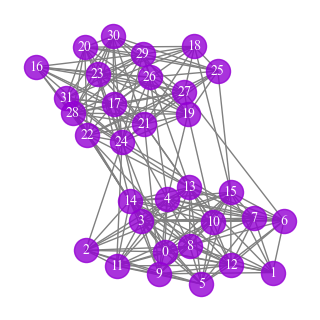

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter010_pintra080_weights


In [31]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [32]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [33]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =201.4944, std=0.0394796149930558
Block: Mean =0.847711, std=0.011540626655429083
--------Sim times---------
No cut: Mean =200.457, std=0.0407774447458323
Block: Mean =0.8218384000000001, std=0.004971240754580308
-----Paths-----
Block: 2048
--------Ratios--------
S/J = 237.69232674814884
T/J >= 4246.730312571148


### $q=32$ sizes=[16,16], $p_{inter}=0.11$

In [34]:
q = 32
seed = 4
cut_loc = 15
sizes = [16,16]
p_intra = 0.8
p_inter = 0.11
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('23', [(0, 23), (8, 23), (10, 23), (12, 23), (15, 23)])
('13', [(13, 16), (13, 17), (13, 21), (13, 24), (13, 27)])
('12', [(12, 17), (12, 18), (12, 24)])
('28', [(2, 28), (3, 28), (6, 28)])
('3', [(3, 24), (3, 26)])
('24s0', [(2, 20)])
('24s1', [(6, 16)])
('24s2', [(9, 20)])
('24s3', [(14, 18)])
('18', [(4, 18)])
('2s0', [(7, 25)])
('20s0', [(9, 22)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7

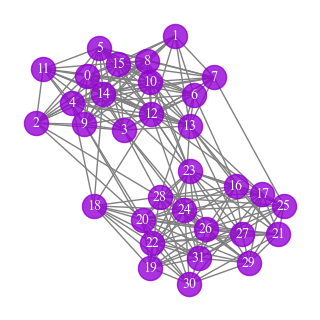

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter011_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter011_pintra080_weights


In [35]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [36]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [37]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =202.76860000000002, std=0.059724701757312475
Block: Mean =1.6047440000000002, std=0.008143698422706971
--------Sim times---------
No cut: Mean =201.72779999999997, std=0.06286938841756963
Block: Mean =1.56446, std=0.007417417340287604
-----Paths-----
Block: 4096
--------Ratios--------
S/J = 126.35573025977975
T/J >= 2243.3484717811684


### $q=32$ sizes=[16,16], $p_{inter}=0.12$

In [38]:
q = 32
seed = 4
cut_loc = 15
sizes = [16,16]
p_intra = 0.8
p_inter = 0.12
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('23', [(2, 23), (5, 23), (8, 23), (11, 23), (12, 23)])
('12', [(12, 16), (12, 17), (12, 21), (12, 26)])
('15', [(15, 16), (15, 18), (15, 19), (15, 20), (15, 29)])
('16', [(2, 16), (13, 16)])
('3', [(3, 18), (3, 19), (3, 21), (3, 27)])
('18', [(6, 18), (11, 18)])
('11', [(11, 17), (11, 24)])
('19', [(14, 19)])
('2s0', [(0, 22)])
('2s1', [(7, 27)])
('2s2', [(9, 25)])
('21s0', [(6, 30)])
('27s0', [(8, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (

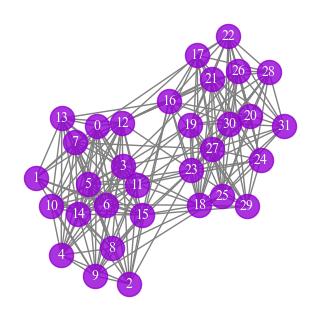

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter012_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter012_pintra080_weights


In [39]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [40]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [41]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =209.71419999999998, std=0.04173439828247703
Block: Mean =3.2191019999999995, std=0.03649604658041744
--------Sim times---------
No cut: Mean =208.67600000000002, std=0.042156849977198096
Block: Mean =3.165348, std=0.03689476353088605
-----Paths-----
Block: 8192
--------Ratios--------
S/J = 65.14680180994576
T/J >= 1118.324302864588


### $q=33$ sizes=[16,17], $p_{inter}=0.1$

In [42]:
q = 33
seed = 4
cut_loc = 15
sizes = [16,17]
p_intra = 0.8
p_inter = 0.1
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('13', [(13, 32), (13, 24), (13, 25), (13, 30)])
('30', [(2, 30), (7, 30)])
('3', [(3, 27), (3, 29), (3, 31)])
('25', [(9, 25), (12, 25)])
('12', [(12, 24), (12, 31)])
('14', [(14, 16), (14, 19), (14, 26)])
('2', [(2, 21)])
('21', [(4, 21)])
('27', [(9, 27)])
('29', [(10, 29)])
('31s0', [(0, 23)])
('31s1', [(7, 16)])
('7s0', [(6, 20)])
('16s0', [(8, 28)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14),

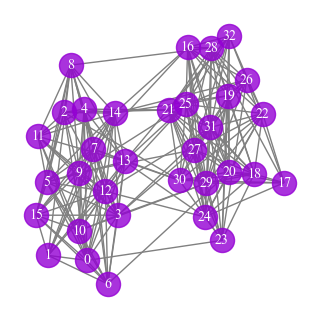

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter010_pintra080_weights


In [43]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [44]:
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [45]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =427.59520000000003, std=0.1023667914902157
Block: Mean =7.409254000000002, std=0.2643994906651674
--------Sim times---------
No cut: Mean =425.51899999999995, std=0.09464882460972611
Block: Mean =7.401797999999999, std=0.26329227253377563
-----Paths-----
Block: 16384
--------Ratios--------
S/J = 57.71096523347694
T/J >= 485.87887525518755


### $q=33$ sizes=[16,16], $p_{inter}=0.09$

In [46]:
q = 33
seed = 4
cut_loc = 15
sizes = [16,17]
p_intra = 0.8
p_inter = 0.09
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('15', [(15, 16), (15, 18), (15, 23), (15, 26), (15, 30)])
('4', [(4, 16), (4, 18), (4, 20), (4, 28)])
('18', [(3, 18)])
('16', [(12, 16)])
('28', [(8, 28), (9, 28)])
('14', [(14, 32), (14, 22), (14, 23)])
('31', [(6, 31), (13, 31)])
('29', [(7, 29), (10, 29)])
('10', [(10, 27)])
('23s0', [(0, 24)])
('0s0', [(2, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 12), (8

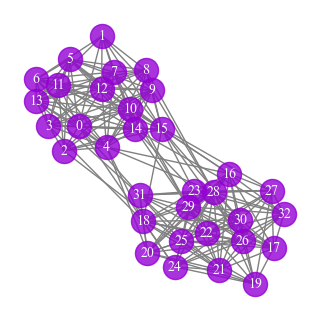

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter009_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter009_pintra080_weights


In [47]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [48]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [49]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =426.63419999999996, std=1.5651746739581525
Block: Mean =0.9821052, std=0.026022781030474017
--------Sim times---------
No cut: Mean =424.56499999999994, std=1.5645373757120697
Block: Mean =0.955836, std=0.026763522346656857
-----Paths-----
Block: 2048
--------Ratios--------
S/J = 434.4078414410187
T/J >= 3665.595091035054


### $q=33$, sizes=[16,17], $p_{inter}=0.12$

In [50]:
q = 33
seed = 2
cut_loc = 15
sizes = [16,17]
p_intra = 0.8
p_inter = 0.12
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('17', [(0, 17), (4, 17), (8, 17), (9, 17), (12, 17)])
('4', [(4, 18), (4, 21), (4, 23), (4, 26)])
('18', [(1, 18), (11, 18)])
('27', [(1, 27), (5, 27), (14, 27)])
('3', [(3, 21), (3, 28), (3, 31)])
('5', [(5, 32), (5, 31)])
('9', [(9, 22), (9, 30)])
('11', [(11, 19), (11, 30)])
('1s0', [(6, 24)])
('1s1', [(8, 32)])
('1s2', [(12, 24)])
('1s3', [(15, 26)])
('21s0', [(7, 25)])
('21s1', [(14, 22)])
('31s0', [(10, 19)])
('remainder', [(0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 9), (2, 11), (2, 12), (2, 14), (2, 15), (3, 4), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (4, 5), (4, 8), (4, 9), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 6), (5, 8), (5, 10), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 13),

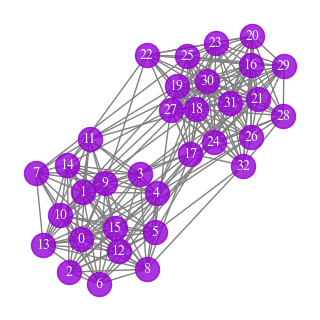

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed2_sizes_16_17_angles_155739_232636_pinter012_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed2_sizes_16_17_angles_155739_232636_pinter012_pintra080_weights


In [51]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [52]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [53]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =463.8466, std=12.571123316553695
Block: Mean =16.88392, std=0.10035085251257236
--------Sim times---------
No cut: Mean =457.0352, std=3.1282240584715226
Block: Mean =16.84314, std=0.10363873021221304
-----Paths-----
Block: 32768
--------Ratios--------
S/J = 27.472684068628613
T/J >= 213.220626489583


### $q=31$ sizes=[15,16], $p_{inter}=0.11$

In [54]:
q = 33
seed = 3
cut_loc = 15
sizes = [16,17]
p_intra = 0.8
p_inter = 0.11
angles = [1.55739, 2.32636]
save_plot = False
verbose = True

Cascades prior to limiting their size
('17', [(1, 17), (5, 17), (9, 17), (15, 17)])
('20', [(1, 20), (6, 20), (8, 20), (10, 20)])
('21', [(0, 21), (12, 21), (14, 21)])
('1', [(1, 23)])
('23', [(10, 23), (13, 23)])
('5', [(5, 18), (5, 30)])
('12', [(12, 26), (12, 29)])
('0', [(0, 25)])
('25', [(6, 25)])
('30', [(4, 30)])
('18', [(7, 18)])
('6s0', [(3, 22)])
('6s1', [(8, 29)])
('6s2', [(14, 19)])
('7', [(7, 27)])
('8s0', [(9, 28)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 9), (0, 10), (0, 12), (0, 14), (0, 15), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 14), (1, 15), (2, 4), (2, 6), (2, 8), (2, 11), (2, 12), (2, 13), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (4, 5), (4, 6), (4, 10), (4, 11), (4, 12), (4, 14), (4, 15), (5, 6), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14),

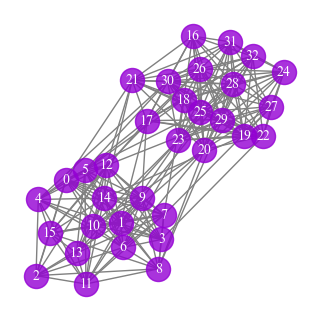

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed3_sizes_16_17_angles_155739_232636_pinter011_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed3_sizes_16_17_angles_155739_232636_pinter011_pintra080_weights


In [55]:
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose)
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(maxcut.G.edges))]
maxcut = gen_weightedMaxCut.WeightedMaxCut(q, seed, cut_loc, sizes, p_intra, p_inter, angles, save_plot, verbose, weights)
maxcut.run_all()

In [56]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

In [59]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =435.86440000000005, std=0.18338004253463297
Block: Mean =34.04216, std=1.1088329190640036
--------Sim times---------
No cut: Mean =433.7866, std=0.18775686405560663
Block: Mean =34.03084, std=1.10979966228144
-----Paths-----
Block: 65536
--------Ratios--------
S/J = 12.803664632326504
T/J >= 105.75122142660747


In [58]:
#translate the output into latex commands

import re
import math

def format_output_to_latex(output: str, x: str) -> str:
    # Helper function to round numbers to 3 decimal places
    def round_str(number_str):
        return f"{float(number_str):.3f}"

    # Extracting values using regular expressions
    mean_std_regex = r"Mean =([\d.]+), std=([\d.e-]+)"
    paths_regex = r"Paths-----\nBlock: (\d+)(?:\nNo Block: (\d+))?"
    ratios_regex = r"Ratios--------\nS/J = ([\d.e+-]+)\nT/J ?[>=]* ([\d.e+-]+)"

    full_times_no_cut = re.findall(mean_std_regex, output.split('Full times')[1].split('Sim times')[0])
    sim_times_no_cut = re.findall(mean_std_regex, output.split('Sim times')[1].split('Paths')[0])
    paths = re.findall(paths_regex, output)
    ratios = re.findall(ratios_regex, output)

    # Check for "No block was obviously timed out"
    no_block_timed_out = "No block was obviously timed out." in output

    # Assigning extracted values and rounding them
    full_times_no_cut_mean, full_times_no_cut_std = map(round_str, full_times_no_cut[0])
    sim_times_no_cut_mean, sim_times_no_cut_std = map(round_str, sim_times_no_cut[0])

    full_times_block_mean, full_times_block_std = map(round_str, full_times_no_cut[1])
    sim_times_block_mean, sim_times_block_std = map(round_str, sim_times_no_cut[1])

    if no_block_timed_out:
        full_times_no_block = "timed out (1 h)"
        sim_times_no_block = "timed out (1 h)"
        paths_no_block_power = 'x'
    else:
        full_times_no_block_mean, full_times_no_block_std = map(round_str, full_times_no_cut[2])
        sim_times_no_block_mean, sim_times_no_block_std = map(round_str, sim_times_no_cut[2])
        full_times_no_block = f"${full_times_no_block_mean}\\, ({full_times_no_block_std})$"
        sim_times_no_block = f"${sim_times_no_block_mean}\\,({sim_times_no_block_std})$"
        paths_no_block = paths[0][1]
        paths_no_block_power = int(math.log2(int(paths_no_block)))

    paths_block = paths[0][0]
    paths_block_power = int(math.log2(int(paths_block)))

    # Extracting and rounding ratio values
    ratio_sj, ratio_tj = map(round_str, ratios[0])

    # Formatting into LaTeX table line
    latex_line = (
        f"{x} & ${full_times_no_cut_mean}\\, ({full_times_no_cut_std})$ "
        f"${sim_times_no_cut_mean}\\,({sim_times_no_cut_std})$ & "
        f"{full_times_no_block} {sim_times_no_block} & "
        f"$2^{{{paths_no_block_power}}}$ & "
        f"${full_times_block_mean}\\, ({full_times_block_std})$ "
        f"${sim_times_block_mean}\\,({sim_times_block_std})$ & "
        f"$2^{{{paths_block_power}}}$ & "
        f"${ratio_sj}$ & ${ratio_tj}$"
    )

    return latex_line
